In [14]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
!cd yolov5

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/mac/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-13 Python-3.8.20 torch-2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ WARN:0@410.702] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


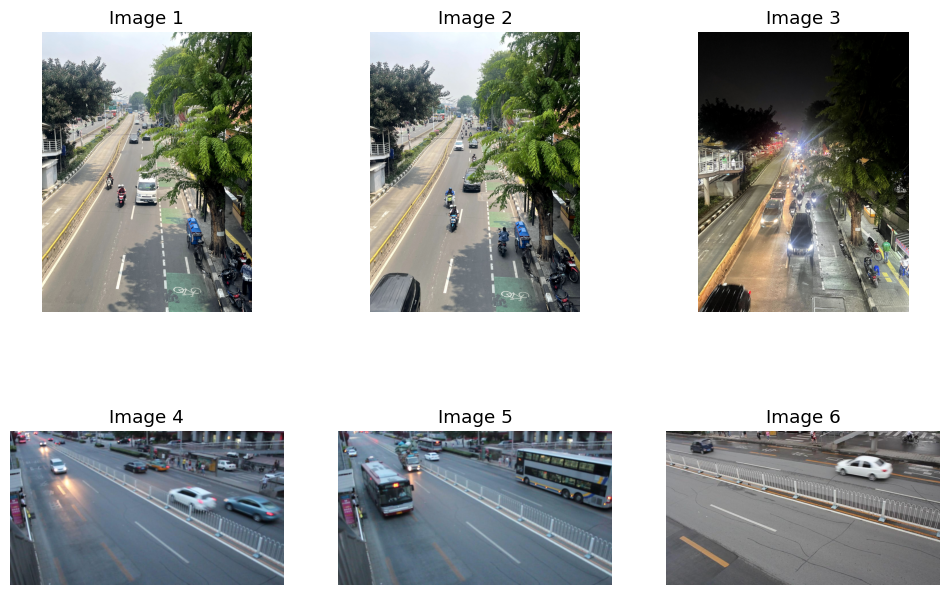

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = [
    "yolov5/data/images/img_3216.jpg",
    "yolov5/data/images/img_3217.jpg",
    "yolov5/data/images/img_3251.jpg",
    "yolov5/data/images/MVI_39781_keep_img00709_jpg.rf.7f781c494c002e86f7788ea0d13a74cd.jpg",
    "yolov5/data/images/MVI_39781_keep_img01585_jpg.rf.746e7f0dfc3139e73d6d962b545b0bbf.jpg",
    "yolov5/data/images/MVI_40181_keep_img00978_jpg.rf.e867ed10ce3ddd8d926f22e8f5a19bf9.jpg"
]

def show_images(image_paths, rows=2, cols=3):
    plt.figure(figsize=(12, 8))
    for i, img_path in enumerate(image_paths):
        img = mpimg.imread(img_path)  
        plt.subplot(rows, cols, i + 1) 
        plt.imshow(img)  
        plt.title(f"Image {i+1}") 
        plt.axis('off')  
    plt.show()
show_images(image_paths)


In [11]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: ⚠️ YOLOv5 is out of date by 8 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: Cannot change to '/Users/mac/Jupyter': No such file or directory
YOLOv5 🚀 2024-9-22 Python-3.8.20 torch-2.2.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, 

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/mac/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-10-19 Python-3.8.20 torch-2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [5]:
import os
img = os.path.join('yolov5/data', 'images', 'img_3216.jpg')

In [6]:
results = model(img)

In [7]:
results.print()

image 1/1: 4032x3024 7 roda >=4s, 3 roda 2s
Speed: 225.1ms pre-process, 742.8ms inference, 22.4ms NMS per image at shape (1, 3, 640, 480)


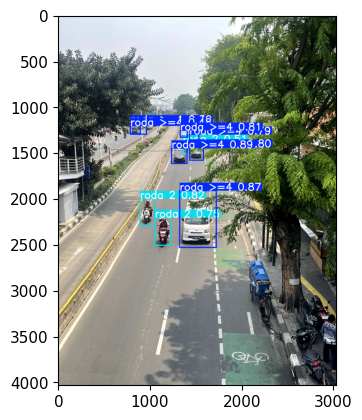

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
cap = cv2.VideoCapture('siang.MOV')

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Press 'q' to quit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [11]:
from tracker import*
import pandas as pd
tracker=Tracker()

class_list = ['roda >=4', 'roda 2']
count=0

In [32]:
cap = cv2.VideoCapture('malam.MOV')

down = {}
counter_down = set()
while True:    
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)

    a = results.pred[0].detach().cpu().numpy() 
    px = pd.DataFrame(a).astype("float")
    
    list = []
             
    for index, row in px.iterrows():
        x1 = int(row[0])  # Top-left X coordinate of bounding box
        y1 = int(row[1])  # Top-left Y coordinate of bounding box
        x2 = int(row[2])  # Bottom-right X coordinate of bounding box
        y2 = int(row[3])  # Bottom-right Y coordinate of bounding box
        confidence = row[4]  # Confidence score
        class_id = int(row[5])  # Class ID (since you have one class, it should be 0)

        if confidence > 0.5: 
            list.append([x1, y1, x2, y2])

    bbox_id = tracker.update(list)
    
    for bbox in bbox_id:
        x3, y3, x4, y4, id = bbox
        cx = int((x3 + x4) // 2)  
        cy = int((y3 + y4) // 2)  

        y_line = 1100
        offset = 7
    
        # Check if the object has crossed the red line
        if y_line < (cy + offset) and y_line > (cy - offset):
            down[id] = cy   
            if id in down:
                # Mark objects that have crossed the line with a red circle and ID label
                cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)
                cv2.putText(frame, str(id), (cx, cy), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
                counter_down.add(id)

    # Drawing the red line and text
    text_color = (255, 255, 255)
    red_color = (0, 0, 255)
    
    cv2.line(frame, (282, 1100), (1004, 1100), red_color, 3)
    cv2.putText(frame, 'batas', (280, 1100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1, cv2.LINE_AA)

    downwards = len(counter_down)
    cv2.putText(frame, f'terhitung - {downwards}', (60, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.0, red_color, 2.5, cv2.LINE_AA)

    # Show the processed frame
    cv2.imshow("frames", frame)
    if cv2.waitKey(1) & 0xFF == 27:  # Press 'ESC' to exit
        break

cap.release()
cv2.destroyAllWindows()
